In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
data = pd.read_excel(r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx")
data

,Player,Nation,Pos,Squad,Age,Tkl,TklW,Blocks,Sh,Pass,Err,MP,Gls,Ast,CrdY,CrdR,short Cmp%,medium Cmp%,long Cmp%,KP,Fls,Crs,OG,AerWon,AerLost,CrdY + CrdR,AerTot
0,Andrea Conti,it ITA,"DF,MF",Sampdoria,27,4,2,4,0,4,0,7,1,0,1,0,87.0,63.6,71.4,0,5,0,0,0,3,1,3
1,Juan Cuadrado,co COL,"DF,MF",Juventus,33,48,23,23,5,18,0,33,4,3,9,0,92.2,88.4,66.7,59,19,134,0,20,14,0,34
2,Danilo,br BRA,"DF,MF",Juventus,30,37,26,21,12,9,1,22,1,2,6,0,93.1,90.3,63.5,14,19,13,0,37,24,6,61
3,Salvador Ferrer,es ESP,"DF,MF",Spezia,23,32,18,24,12,12,0,27,0,3,3,0,82.6,79.6,60.2,15,13,44,0,34,23,3,57
4,Gianluca Frabotta,it ITA,"DF,MF",Hellas Verona,22,0,0,1,0,1,0,2,0,0,0,0,25.0,50.0,NaN,0,2,3,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Mattia Zanotti,it ITA,DF,Inter,18,1,0,0,0,0,0,1,0,0,0,0,100.0,100.0,NaN,1,0,0,0,0,0,0,0
212,Gabriele Zappa,it ITA,DF,Cagliari,21,21,9,15,5,10,0,25,0,0,4,1,86.6,76.7,53.6,7,16,25,0,12,9,5,21
213,Davide Zappacosta,it ITA,DF,Atalanta,29,32,22,32,2,30,0,34,1,5,6,0,92.7,82.4,48.6,33,31,88,0,5,12,6,17
214,Marvin Zeegelaar,nl NED,DF,Udinese,30,15,11,12,4,8,1,14,0,0,2,0,82.6,78.6,62.5,1,13,2,0,13,7,2,20


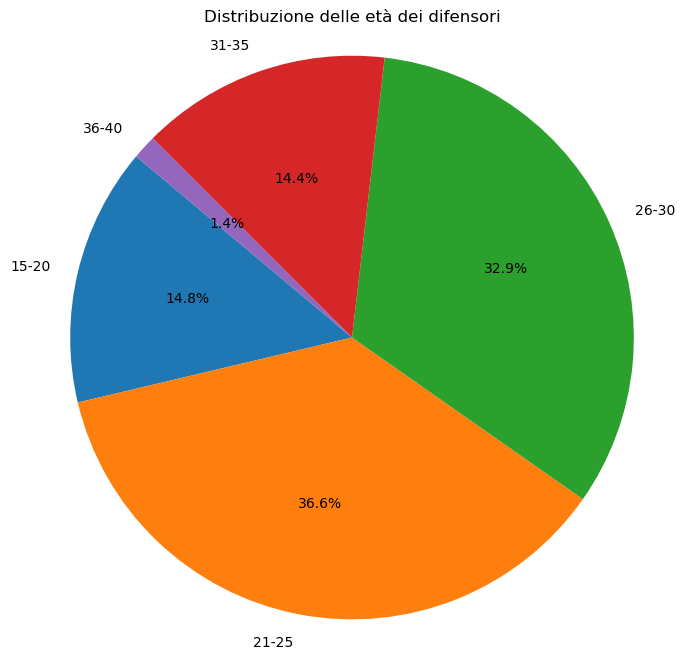

In [3]:
#diagramma a torta

eta = data['Age']

# Definisci le fasce di età
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Categorizza le età nelle fasce specificate
eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

# Conta il numero di difensori in ciascuna fascia
eta_counts = eta_bins.value_counts().sort_index()

# Crea il diagramma a torta
plt.figure(figsize=(8, 8))
plt.pie(eta_counts, labels=eta_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle età dei difensori')
plt.axis('equal')  # Per rendere il diagramma a torta circolare



# Aggiungi la legenda
#ax.legend([f"{label} - {int(count)} ({pct:.1f}%)" for label, count, pct in zip(eta_counts.index, eta_counts, 100*eta_counts/eta_counts.sum())], title="Fasce d'età", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mostra il diagramma a torta
plt.show()


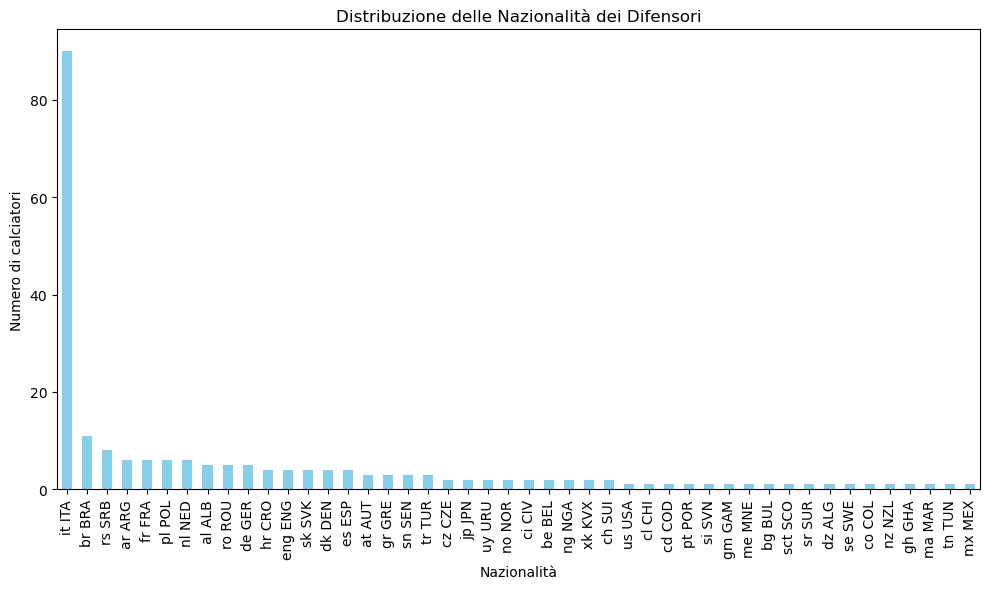

In [4]:
#istogramma nazionalità
nazionalita = data['Nation']

# Conta il numero di calciatori per ciascuna nazionalità
nazionalita_counts = nazionalita.value_counts()

# Crea l'istogramma
fig, ax = plt.subplots(figsize=(10, 6))
nazionalita_counts.plot(kind='bar', ax=ax, color='skyblue')

# Aggiungi i titoli e le etichette
ax.set_title('Distribuzione delle Nazionalità dei Difensori')
ax.set_xlabel('Nazionalità')
ax.set_ylabel('Numero di calciatori')

# Ruota le etichette sull'asse x per una migliore leggibilità
# plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()
plt.show()

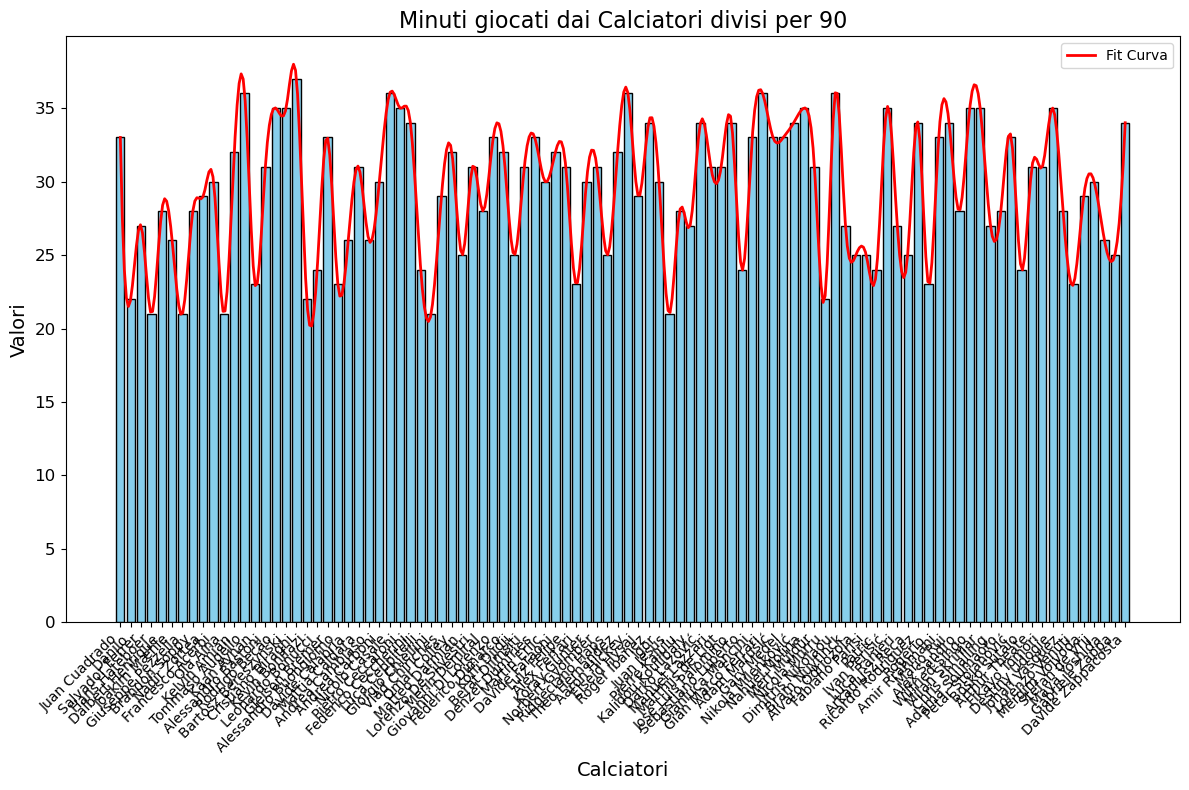

La media risulta: 29.377551020408163


In [5]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Estrai i dati rilevanti
calciatori = data['Player'] 
valori = data['MP']      

#Considero calciatori con più di 20 apparizioni
filtrato = valori > 20
calciatori_filtrati = calciatori[filtrato]
valori_filtrati = valori[filtrato]

# Crea un istogramma
plt.figure(figsize=(12, 8))
plt.bar(calciatori_filtrati, valori_filtrati, color='skyblue', edgecolor='black')

# Ottimizza il layout
plt.xlabel('Calciatori', fontsize=14)
plt.ylabel('Valori', fontsize=14)
plt.title('Minuti giocati dai Calciatori divisi per 90', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

# Aggiungi una curva di fit
x = np.arange(len(calciatori_filtrati))  # Converti l'indice dei calciatori filtrati in numerico
spl = make_interp_spline(x, valori_filtrati, k=3)  # Fit con spline
x_smooth = np.linspace(x.min(), x.max(), 500)  # Genera un range di valori lisciato
y_smooth = spl(x_smooth)

plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Fit Curva')

plt.tight_layout()
plt.legend()
plt.show()

media_valori_filtrati = valori_filtrati.mean()

# Mostra il risultato
print("La media risulta:", media_valori_filtrati)

In [6]:
import numpy as np

def calculate_bins(data):
    n = len(data)
    sigma = np.std(data)
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    
    # Regola di Freedman-Diaconis
    bin_width_fd = 2 * IQR / (n ** (1/3))
    num_bin_fd = int(np.ceil((data.max() - data.min()) / bin_width_fd))
    
    return num_bin_fd

In [7]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_histogram(data, label, xlabel, ylabel, title):
    # Filtra i valori non finiti (inf, -inf) e rimuovi NaN
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Calcola il numero di bin
    num_bins = calculate_bins(data)
    
    # Crea un istogramma dei dati
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(data, bins=num_bins, alpha=0.7, color='blue', edgecolor='black', label=label)
    
    # Funzione di fit (es. Gaussiana)
    def gauss(x, a, x0, sigma):
        return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
    
    # Calcola il centro dei bins per il fit
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Parametri iniziali per il fit gaussiano
    p0 = [max(counts), data.mean(), data.std()]
    
    # Fit dei dati con la funzione gaussiana
    try:
        popt, _ = curve_fit(gauss, bin_centers, counts, p0=p0, maxfev=2000)
        print("Parametri ottimali del fit:", popt)  # Stampa i parametri ottimali del fit
        # Sovrapposizione del fit sull'istogramma solo se il fit ha successo
        x_fit = np.linspace(bins[0], bins[-1], 100)
        y_fit = gauss(x_fit, *popt)
        plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')
    except RuntimeError as e:
        print(f"Errore durante il fitting: {e}")
    
    # Personalizzazione del grafico
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Mostra il grafico
    plt.show()
    
    # Calcola e mostra la media dei dati
    media_valori = data.mean()
    print(f"La media risulta: {media_valori}")

In [8]:
def calcola_tackle(data):
    rapporti = data['TklW'] / data['Tkl']
    plot_histogram(rapporti, 'Tackles', 'Tackles riusciti', 'Numero di calciatori', 'Istogramma dei Tackles riusciti')

def calcola_intercettazioni(data):
    intercettazioni = data['Blocks']
    plot_histogram(intercettazioni, 'Intercettazioni', 'Intercettazioni', 'Numero di calciatori', 'Istogramma delle intercettazioni')

def calcola_passaggi(data):
    rapporti = (data['short Cmp%'] + data['medium Cmp%'] + data['long Cmp%']) / 3
    plot_histogram(rapporti, 'Precisione passaggi', 'Passaggi riusciti %', 'Numero di calciatori', 'Istogramma dei passaggi riusciti')

def calcola_gol(data):
    gol = data['Gls']
    plot_histogram(gol, 'Gol', 'Gol', 'Numero di calciatori', 'Istogramma dei gol')

def calcola_assist(data):
    presenze = data['MP']
    ast = data['Ast']
    # Filtra i dati dove 'MP' è maggiore o uguale a 5
    filtrati = data[presenze >= 5]
    ast = filtrati['Ast']
    plot_histogram(ast, 'Assist', 'Assist', 'Numero di calciatori', 'Istogramma degli assist')

def calcola_cartellini(data):
    cart = data['CrdY'] + data['CrdR']
    plot_histogram(cart, 'Cartellini', 'Cartellini', 'Numero di calciatori', 'Istogramma dei cartellini')

def calcola_key_passes(data):
    presenze = data['MP']
    kp = data['KP']
    # Filtra i dati dove 'MP' è maggiore o uguale a 5
    filtrati = data[presenze >= 5]
    kp = filtrati['KP']
    plot_histogram(kp, 'Key passes', 'Key passes', 'Numero di calciatori', 'Istogramma dei Key passes')

def calcola_duelli_aerei(data):
    Aerw = data['AerWon']
    Aertot = data['AerTot']
    # Calcola il rapporto per ogni calciatore
    rapporti = Aerw / Aertot
    plot_histogram(rapporti, 'Duelli aerei vinti', 'Duelli aerei vinti', 'Numero di calciatori', 'Istogramma dei duelli aerei vinti')

Parametri ottimali del fit: [44.28249894  0.5789183   0.07336089]


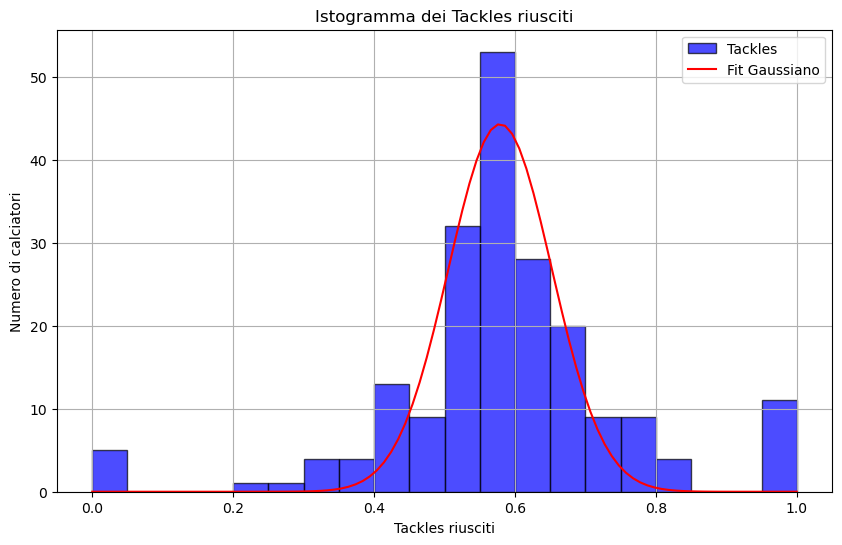

La media risulta: 0.5842373783969937
Parametri ottimali del fit: [127.51492853 -53.92802245  44.23667734]


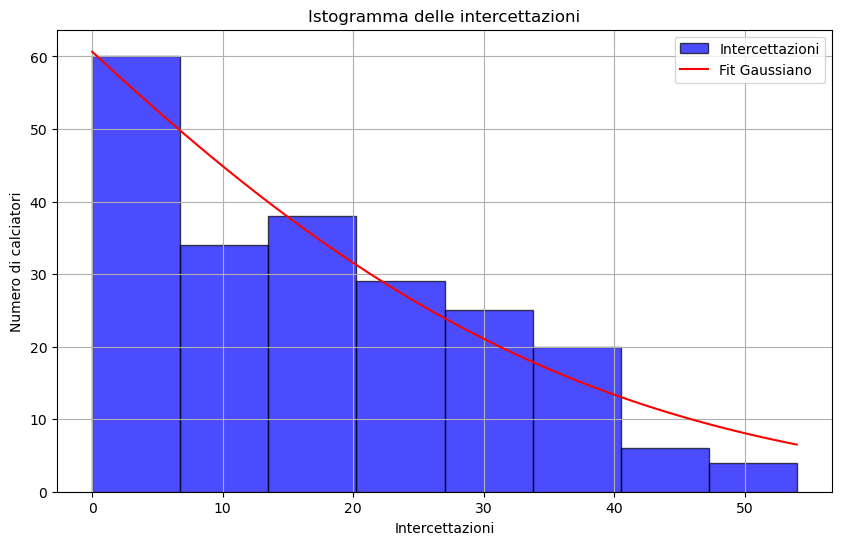

La media risulta: 17.324074074074073
Parametri ottimali del fit: [34.07304583 76.14592066  8.03812602]


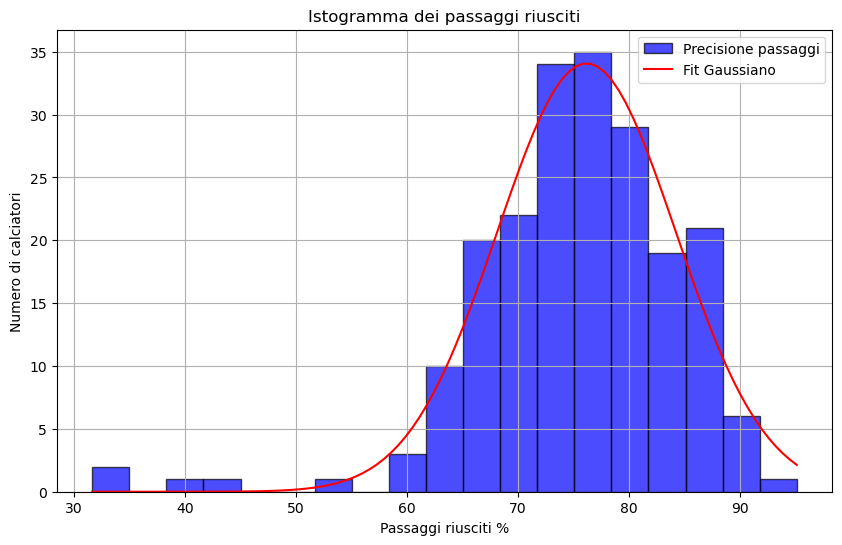

La media risulta: 75.40260162601626
Parametri ottimali del fit: [2.60341987e+02 6.14251263e-02 9.34042458e-02]


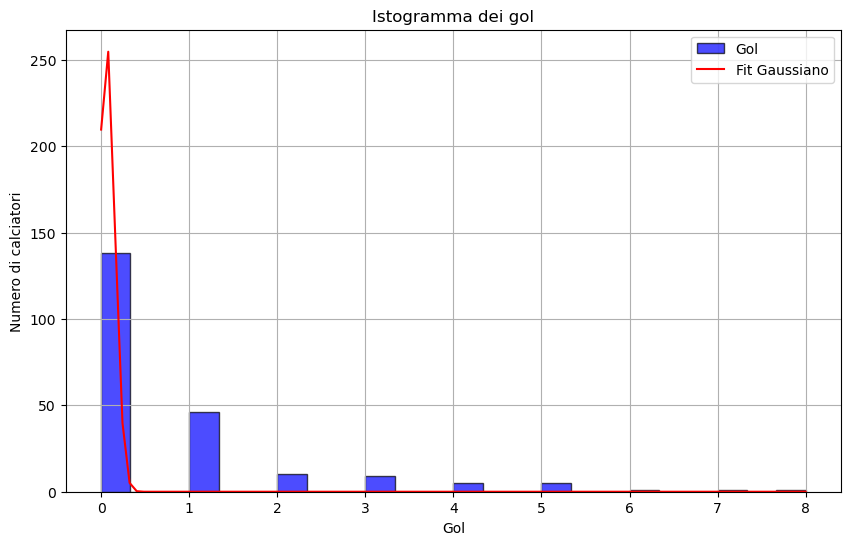

La media risulta: 0.7361111111111112
Parametri ottimali del fit: [2.94746991e+02 2.33680252e-02 1.00197122e-01]


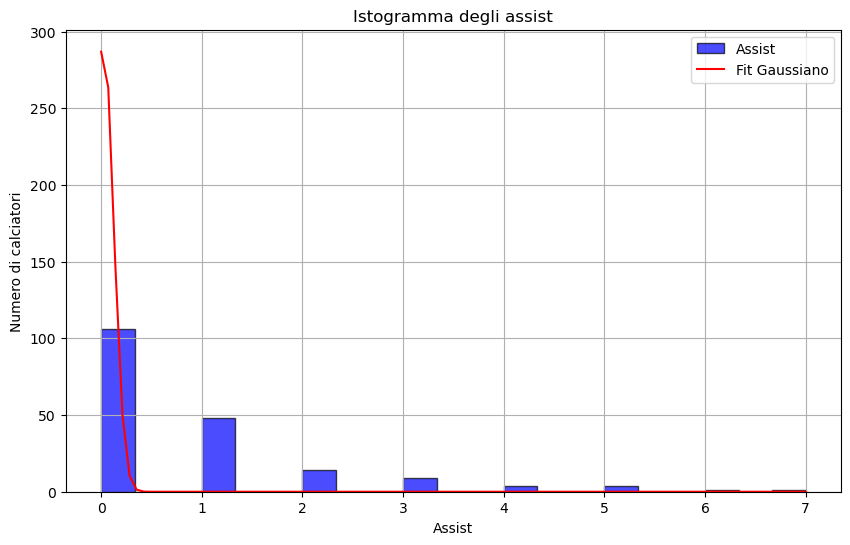

La media risulta: 0.8128342245989305
Parametri ottimali del fit: [954.51908493 -28.48893637  12.23687878]


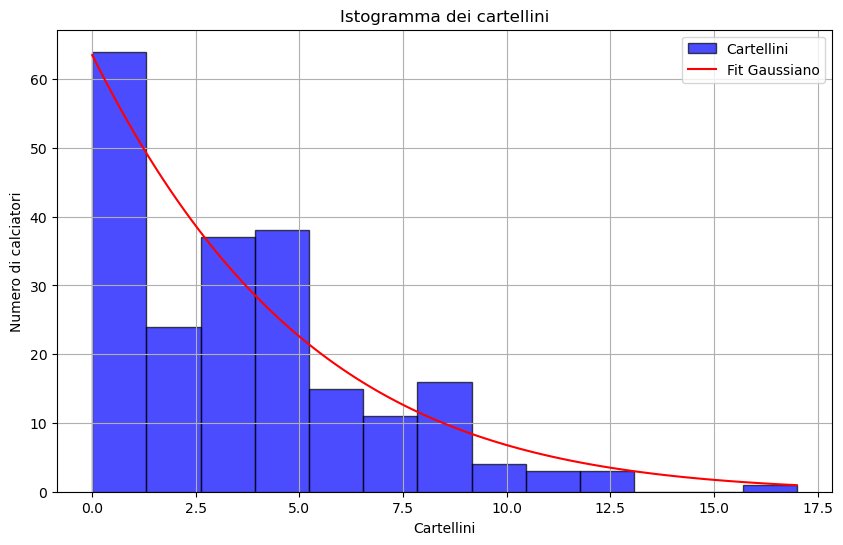

La media risulta: 3.638888888888889
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


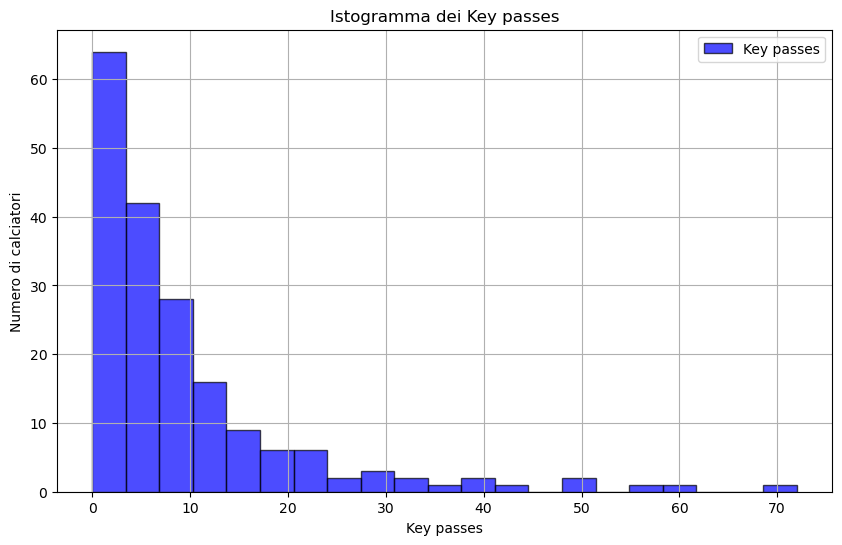

La media risulta: 9.459893048128341
Parametri ottimali del fit: [36.85151608  0.55330532  0.12878487]


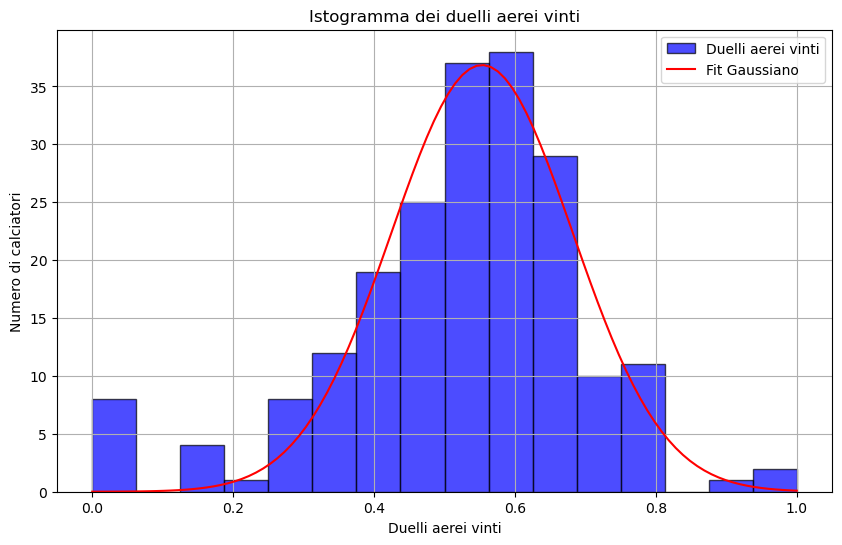

La media risulta: 0.516363760823837


In [10]:
import pandas as pd

# Carica i dati
data = pd.read_excel(r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx")

# Calcola e visualizza i grafici
calcola_tackle(data)
calcola_intercettazioni(data)
calcola_passaggi(data)
calcola_gol(data)
calcola_assist(data)
calcola_cartellini(data)
calcola_key_passes(data)
calcola_duelli_aerei(data)